/var/folders/z3/sk2c0q6j5jqfyd9r8pm2_vrr0000gp/T/ipykernel_77357/339047847.py:14: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
/Users/pedro/.pyenv/versions/doc/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:164: UserWarning: Style JSON file 'iqp.json' not found in any of these locations: /Users/pedro/.pyenv/versions/doc/lib/python3.10/site-packages/qiskit/visualization/circuit/styles/iqp.json, iqp.json. Will use default style.
  self._style, def_font_ratio = load_style(style)


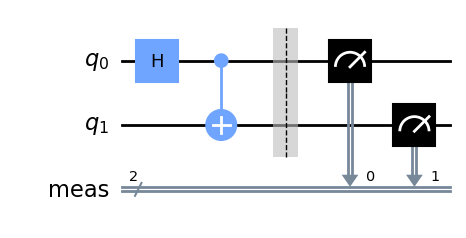

Mitigated Result: {'00': 255.84954562278486, '01': 255.85934954782897, '10': 256.0816358657083, '11': 256.20946896367786}


In [1]:
#-------------------------------------------------------------------------
# Quantum Error Mitigation 
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import numpy as np
from qiskit.visualization import circuit_drawer

from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
#-------------------------------------------------------------------------

# Create a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Draw the circuits
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Define noise model
noise_model = NoiseModel()

# Add 1-qubit depolarizing error to single-qubit gates
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h'])

# Add 2-qubit depolarizing error to the 'cx' gate
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

# Simulate with noise
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator, noise_model=noise_model).result()

# Apply error mitigation
# Pass a list of qubit indices instead of an integer
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1], qr=qc.qregs[0])
meas_fitter = CompleteMeasFitter(result, state_labels)
mitigated_result = meas_fitter.filter.apply(result)

print("Mitigated Result:", mitigated_result.get_counts())



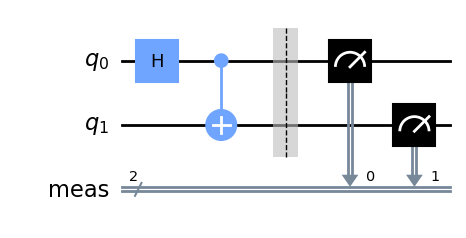

In [2]:
# Draw the circuits
display(circuit_drawer(qc, output='mpl', style="iqp"))